# 13 - Projectile motion including Earth's curvature

If we look at projectile motion on much longer spatial scales, we need to make further modifications to our model. These modifications are necessary because we can no longer neglect the curvature of the Earth. Let's assume that our projectile remains close enough to the Earth that the magnitude of free fall acceleration does not change appreciably. How do we incorporate Earth's curvature?
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>








































\begin{equation*}F_g=-g\hat{r},\end{equation*} but $\hat{r}=\vec{r}/|\vec{r}|$..... So 
\begin{align} &F_{gx}=-gx/r & F_{gy}=-gy/r &\end{align}

## Incorporating Earth's curvature
We need to make two changes to incorporate Earth's curvature.
* Our acceleration is given by $\vec{a}=-g\hat{r}=-g\vec{r}/r$ where $\vec{r}$ is the projectile's position vector with respect to the center of the Earth.
* The ball hits the ground when $r=R_E$ (instead of $y=0$ which is what we used when we defined Earth's surface as $y=0$). $R_E=6378$ km.

Use the relationships above to write a program that examines projectile motion where Earth's curvature is accounted for. Use `odeint` as your differential equation solver.

$\vec{r}=x\hat{i}+y\hat{j}$

$ r=|\vec{r}|=\sqrt{x^2+y^2}$

Text(0.5, 1.0, 'Projectile motion trajectory')

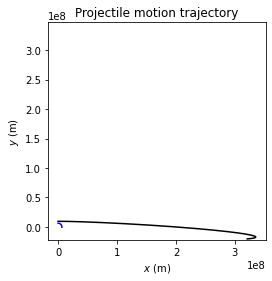

In [22]:
# Import modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define ODE function
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = np.sqrt(x**2+y**2)
    
    fx = vx
    fy = vy
    fvx = -g*x/rmag
    fvy = -g*y/rmag
    
    return fx, fy, fvx, fvy


# Run parameters
g = 9.8
R_E = 6.378e6 # Radius of Earth in meters
x0 = 0.0
y0 = R_E + 0.5*R_E
thetadeg = 0 # degrees
v0 = 80000 # 5000 # m/s
t0 = 0.0
tf = 10000
N = 1e5
h = (tf-t0)/N

theta = thetadeg/180*np.pi # radians
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# Data containers
tpoints = np.arange(t0,tf+h,h)

# Initialize any parameters for ODE solver
r = np.array([x0,y0,vx0,vy0],float)

# Use odeint solver
rpoints = odeint(f,r,tpoints)
xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# Find the point when projectile hits the ground and stop changing data points
ifin = np.argmax(np.sqrt(xpoints**2+ypoints**2) < R_E)
if ifin <= 0:
    ifin = np.size(ypoints)-1
xpoints[ifin:]=xpoints[ifin]
ypoints[ifin:]=ypoints[ifin]

# Determine coords for Earth's surface
Ex = [0]
Ey = [R_E]
angmax = -(np.arctan2(ypoints[-1],xpoints[-1])-np.pi/2)
if angmax <0:
    angmax = angmax + 2*np.pi
angres = angmax/1000
ang = 0
while ang < angmax:
    ang += angres
    Ey.append(R_E*np.cos(ang))
    Ex.append(R_E*np.sin(ang))

# Plot
# Plot projectile results and Earth's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Ex,Ey,'b')
plt.xlim([-7e6,7e6])
plt.ylim([-1e7,1e7])
plt.axis('square')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
**Pre-generated code:**

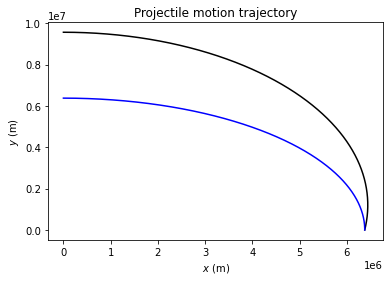

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

g = 9.8
R_E = 6.378e6 # radius of Earth in meters

def f(r,t):
    vecr = np.array([r[0],r[1]])
    vecv = np.array([r[2],r[3]])
        
    f = vecv
    fv = -g*vecr/np.linalg.norm(vecr)
    
    return f[0],f[1],fv[0],fv[1]


x0 = 0.0 # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
y0 = R_E + .5*R_E # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
v0 = 7000 # m/s
theta = 00.0 # degrees
vx0 = v0*np.cos(theta*np.pi/180)
vy0 = v0*np.sin(theta*np.pi/180)
t0 = 0.0     
tf = 5000.0    
N = 100000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([x0,y0,vx0,vy0],float)

rpoints = odeint(f,r,tpoints) 

xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# Find the point when projectile hits the ground and stop changing data points
yfin = np.argmax(np.sqrt(xpoints**2+ypoints**2) < R_E)
if yfin <= 0:
    yfin = np.size(ypoints)-1
xpoints[yfin:]=xpoints[yfin]
ypoints[yfin:]=ypoints[yfin]

# Determine coordinates for Earth's surface
Ex = [0]
Ey = [R_E]
angmax = -(np.arctan2(ypoints[-1],xpoints[-1])-np.pi/2)
if angmax < 0:
    angmax = angmax + 2*np.pi
angres = (angmax)/1000
ang = 0
while ang < angmax:
    ang += angres
    Ey.append(R_E*np.cos(ang))
    Ex.append(R_E*np.sin(ang))

# Plot projectile results and Earth's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Ex,Ey,'b')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## What if the projectile is too far away to consider constant gravitational force?


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## What if the projectile is too far away to consider constant gravitational force?
In this case, we resort to Newton's Law of Gravitation, namely \begin{equation*} \vec{F}_G = -\frac{GMm}{r^2} \hat{r}.\end{equation*}

This can be rewritten as \begin{equation*} \vec{F}_G = -\frac{GMm}{r^3} \vec{r}.\end{equation*}

### Change the previous code to account for this added complexity:

Text(0.5, 1.0, 'Projectile motion trajectory')

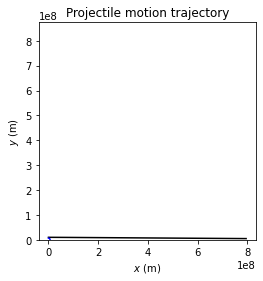

In [1]:
# Import modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define ODE function
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = np.sqrt(x**2+y**2)
    
    fx = vx
    fy = vy
    #fvx = -g*x/rmag
    fvx = -G*M*x/rmag**3
    #fvy = -g*y/rmag
    fvy = -G*M*y/rmag**3
    
    return fx, fy, fvx, fvy


# Run parameters
G = 6.67408e-11
M = 5.972e24 # Mass of central body (Earth in this case)
g = 9.8
R_E = 6.378e6 # Radius of Earth in meters
x0 = 0.0
y0 = R_E + 0.5*R_E
thetadeg = 0 # degrees
v0 = 80000 # 5000 # m/s
t0 = 0.0
tf = 10000
N = 1e5
h = (tf-t0)/N

theta = thetadeg/180*np.pi # radians
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

# Data containers
tpoints = np.arange(t0,tf+h,h)

# Initialize any parameters for ODE solver
r = np.array([x0,y0,vx0,vy0],float)

# Use odeint solver
rpoints = odeint(f,r,tpoints)
xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# Find the point when projectile hits the ground and stop changing data points
ifin = np.argmax(np.sqrt(xpoints**2+ypoints**2) < R_E)
if ifin <= 0:
    ifin = np.size(ypoints)-1
xpoints[ifin:]=xpoints[ifin]
ypoints[ifin:]=ypoints[ifin]

# Determine coords for Earth's surface
Ex = [0]
Ey = [R_E]
angmax = -(np.arctan2(ypoints[-1],xpoints[-1])-np.pi/2)
if angmax <0:
    angmax = angmax + 2*np.pi
angres = angmax/1000
ang = 0
while ang < angmax:
    ang += angres
    Ey.append(R_E*np.cos(ang))
    Ex.append(R_E*np.sin(ang))

# Plot
# Plot projectile results and Earth's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Ex,Ey,'b')
plt.xlim([-7e6,7e6])
plt.ylim([-1e7,1e7])
plt.axis('square')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Pre-generated solution:

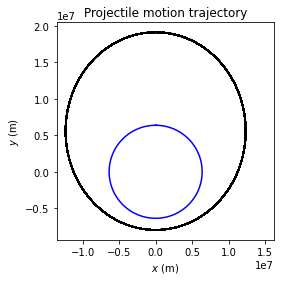

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

G = 6.67408e-11
M = 5.972e24 # Mass of central body (Earth in this case)
R = 6.378e6 # radius of central body (Earth in this case)

def f(r,t):
    #vecr = np.array([r[0],r[1]])
    #vecv = np.array([r[2],r[3]])
        
    #f = vecv
    #fv = -G*M/(np.linalg.norm(vecr)**3)*vecr
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = np.sqrt(x**2+y**2)
    
    fx = vx
    fy = vy
    fvx = -G*M*x/rmag**3
    fvy = -G*M*y/rmag**3    
    
    #return f[0],f[1],fv[0],fv[1]
    return fx, fy, fvx, fvy


x0 = 0.0 # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
y0 = 3*R # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
v0 = 3500 # m/s
theta = 0.0 # degrees
vx0 = v0*np.cos(theta*np.pi/180)
vy0 = v0*np.sin(theta*np.pi/180)
t0 = 0.0     
tf = 1000000.0    
N = 1000000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([x0,y0,vx0,vy0],float)

rpoints = odeint(f,r,tpoints) 

xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# Find the point when projectile hits the ground and stop changing data points
yfin = np.argmax(np.sqrt(xpoints**2+ypoints**2) < R)
if yfin <= 0:
    yfin = np.size(ypoints)-1
xpoints[yfin:]=xpoints[yfin]
ypoints[yfin:]=ypoints[yfin]

# Determine coordinates for Earth's surface
Ex = [0]
Ey = [R]
angarr = -(np.arctan2(ypoints,xpoints)-np.pi/2)
angarr[angarr<0]=angarr[angarr<0]+2*np.pi
angmax = np.max(angarr)
if angmax < 0:
    angmax = angmax + 2*np.pi
angres = (angmax)/1000
ang = 0
while ang < angmax:
    ang += angres
    Ey.append(R*np.cos(ang))
    Ex.append(R*np.sin(ang))

# Plot projectile results and Earth's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Ex,Ey,'b')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')
plt.axis('square')
plt.show()


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Let's also incorporate drag for a missle launch
For a missle being launched from one location on Earth and landing in another location on Earth, we will assume $C_D\approx 0.78$ in our quadratic drag equation for a ballistic missile. For additional complexity, let's assume that the Earth's air density varies as a function of altitude: \begin{equation*}\rho(R_E + h)=\rho_0 e^{-\rho_0 g h/P_0}\end{equation*} where $h$ is the altitude above Earth's surface, $\rho_0=\rho(R_E)$ and $P_0\approx 101325$ Pa.

Incorporate this added complexity into our previous code.

<br><br><br><br><br><br><br><br><br><br><br><br><br>
Pre-generated code:

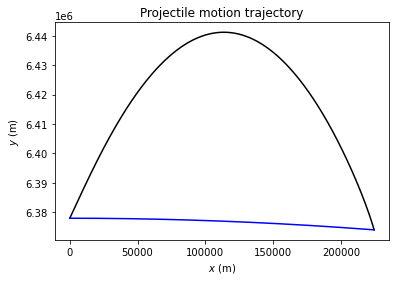

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

G = 6.67408e-11
M = 5.972e24 # Mass of central body (Earth in this case)
R = 6.378e6 # radius of central body (Earth in this case)
rho0 = 1.225 # kg/m^3, air density at sea level on Earth's surface
P0 = 101325 # Air pressure at sea level on Earth's surface
A = 2.76 # m^2 for V-2 rocket
m = 12500 # kg for V-2 rocket

def f(r,t):
    vecr = np.array([r[0],r[1]])
    vecv = np.array([r[2],r[3]])
    vnorm = np.linalg.norm(vecv)
    
    h = np.linalg.norm(vecr)-R
    rho = rho0*np.exp(-rho0*g*h/P0) # We will use g here. If an object is far enough out that we need Newton's gravity law, drag likely not a factor.
    Cd = 0.78 # for missiles, this could range from 0.6-0.95 according to https://www.mpoweruk.com/ballistics.htm
    b2 = 0.5*Cd*rho*A
        
    f = vecv
    fv = -G*M/(np.linalg.norm(vecr)**3)*vecr-(b2/m)*vnorm*vecv
    
    return f[0],f[1],fv[0],fv[1]


x0 = 0.0 # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
y0 = R # Assume that we launch from a location at 12 o'clock when Earth looks like a circle.
v0 = 5000 # m/s, ICBMs can travel up to 5000 m/s!
theta = 45.0 # degrees
vx0 = v0*np.cos(theta*np.pi/180)
vy0 = v0*np.sin(theta*np.pi/180)
t0 = 0.0     
tf = 100000.0    
N = 1000000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([x0,y0,vx0,vy0],float)

rpoints = odeint(f,r,tpoints) 

xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# Find the point when projectile hits the ground and stop changing data points
yfin = np.argmax(np.sqrt(xpoints**2+ypoints**2) < R)
if yfin <= 0:
    yfin = np.size(ypoints)-1
xpoints[yfin:]=xpoints[yfin]
ypoints[yfin:]=ypoints[yfin]

# Determine coordinates for Earth's surface
Ex = [0]
Ey = [R]
angarr = -(np.arctan2(ypoints,xpoints)-np.pi/2)
angarr[angarr<0]=angarr[angarr<0]+2*np.pi
angmax = np.max(angarr)
if angmax < 0:
    angmax = angmax + 2*np.pi
angres = (angmax)/1000
ang = 0
while ang < angmax:
    ang += angres
    Ey.append(R*np.cos(ang))
    Ex.append(R*np.sin(ang))

# Plot projectile results and Earth's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Ex,Ey,'b')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')
plt.show()


## Play around with the above code to try and find the launch angle that gives the longest Intercontinnental Ballistic Missile (ICBM) range (assuming only projectile motion). Is it what we predicted in PHY 111?

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## What further complexity is needed to accurately model an ICBM?